In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

path = '/content/drive/MyDrive/data/airline'
os.chdir(path)
sns.color_palette("Set2")

train = pd.read_csv('train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

- null값은 없는듯하다

In [4]:
train.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1
5,6,Female,Loyal Customer,42,Business travel,Business,1780,4,4,4,4,3,3,4,5,5,4,5,3,5,4,0,0.0,1
6,7,Female,disloyal Customer,20,Business travel,Eco,2980,3,3,3,4,5,3,5,5,1,5,3,1,4,5,12,34.0,0
7,8,Male,Loyal Customer,38,Business travel,Eco,1386,4,3,3,3,4,4,4,4,1,2,2,1,5,4,0,0.0,1
8,9,Female,Loyal Customer,51,Business travel,Business,2346,2,2,2,2,3,4,5,3,3,3,3,3,3,3,0,0.0,1
9,10,Male,Loyal Customer,8,Personal Travel,Eco,1336,2,5,2,5,5,2,5,5,5,5,5,4,5,5,0,0.0,0


- target을 맞춰야하는데 0, 1 인 이진분류인듯하다.

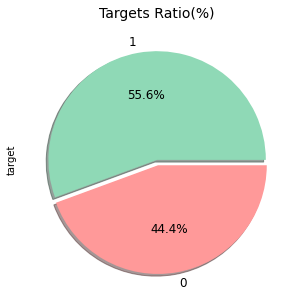

In [5]:
colors = ['#8fd9b6', '#ff9999']

plt.subplots(figsize = (5,5))
train['target'].value_counts(normalize = True).plot(kind = 'pie', 
                                                    autopct = '%.1f%%', 
                                                    fontsize = 12, 
                                                    explode = [0, 0.05], 
                                                    shadow = True, 
                                                    colors = colors)
plt.title('Targets Ratio(%)', fontsize = 14)
plt.show()

- target에 약간의 불균형이 있는듯 하지만 심하지는 않아 보인다. 그냥 진행해도 무방하겠다.

### Gender

In [8]:
print('Genger Unique is', train['Gender'].unique())

train['Gender'].value_counts()

Genger Unique is ['Female' 'Male']


Male      1502
Female    1498
Name: Gender, dtype: int64

- 설문의 대상, 즉 성별이 하나로 치우쳐지지 않은 듯 하다.

In [14]:
train.groupby(['Gender'])['target'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,1498.0,0.67223,0.469557,0.0,0.0,1.0,1.0,1.0
Male,1502.0,0.44008,0.496562,0.0,0.0,0.0,1.0,1.0
